In [ ]:
! pip3 install google-cloud-vision
! pip3 install Pillow==8.3.1
! pip3 install tqdm

In [46]:
import io
from google.cloud import vision
from PIL import Image, ImageDraw, ImageFont
import json
import proto

In [47]:
client = vision.ImageAnnotatorClient()

In [56]:
path = "../../data/frames/mi_csk/mi_csv_frame005338.png"

with io.open(path, 'rb') as image_file:
    content = image_file.read()
    
image = vision.Image(content=content)

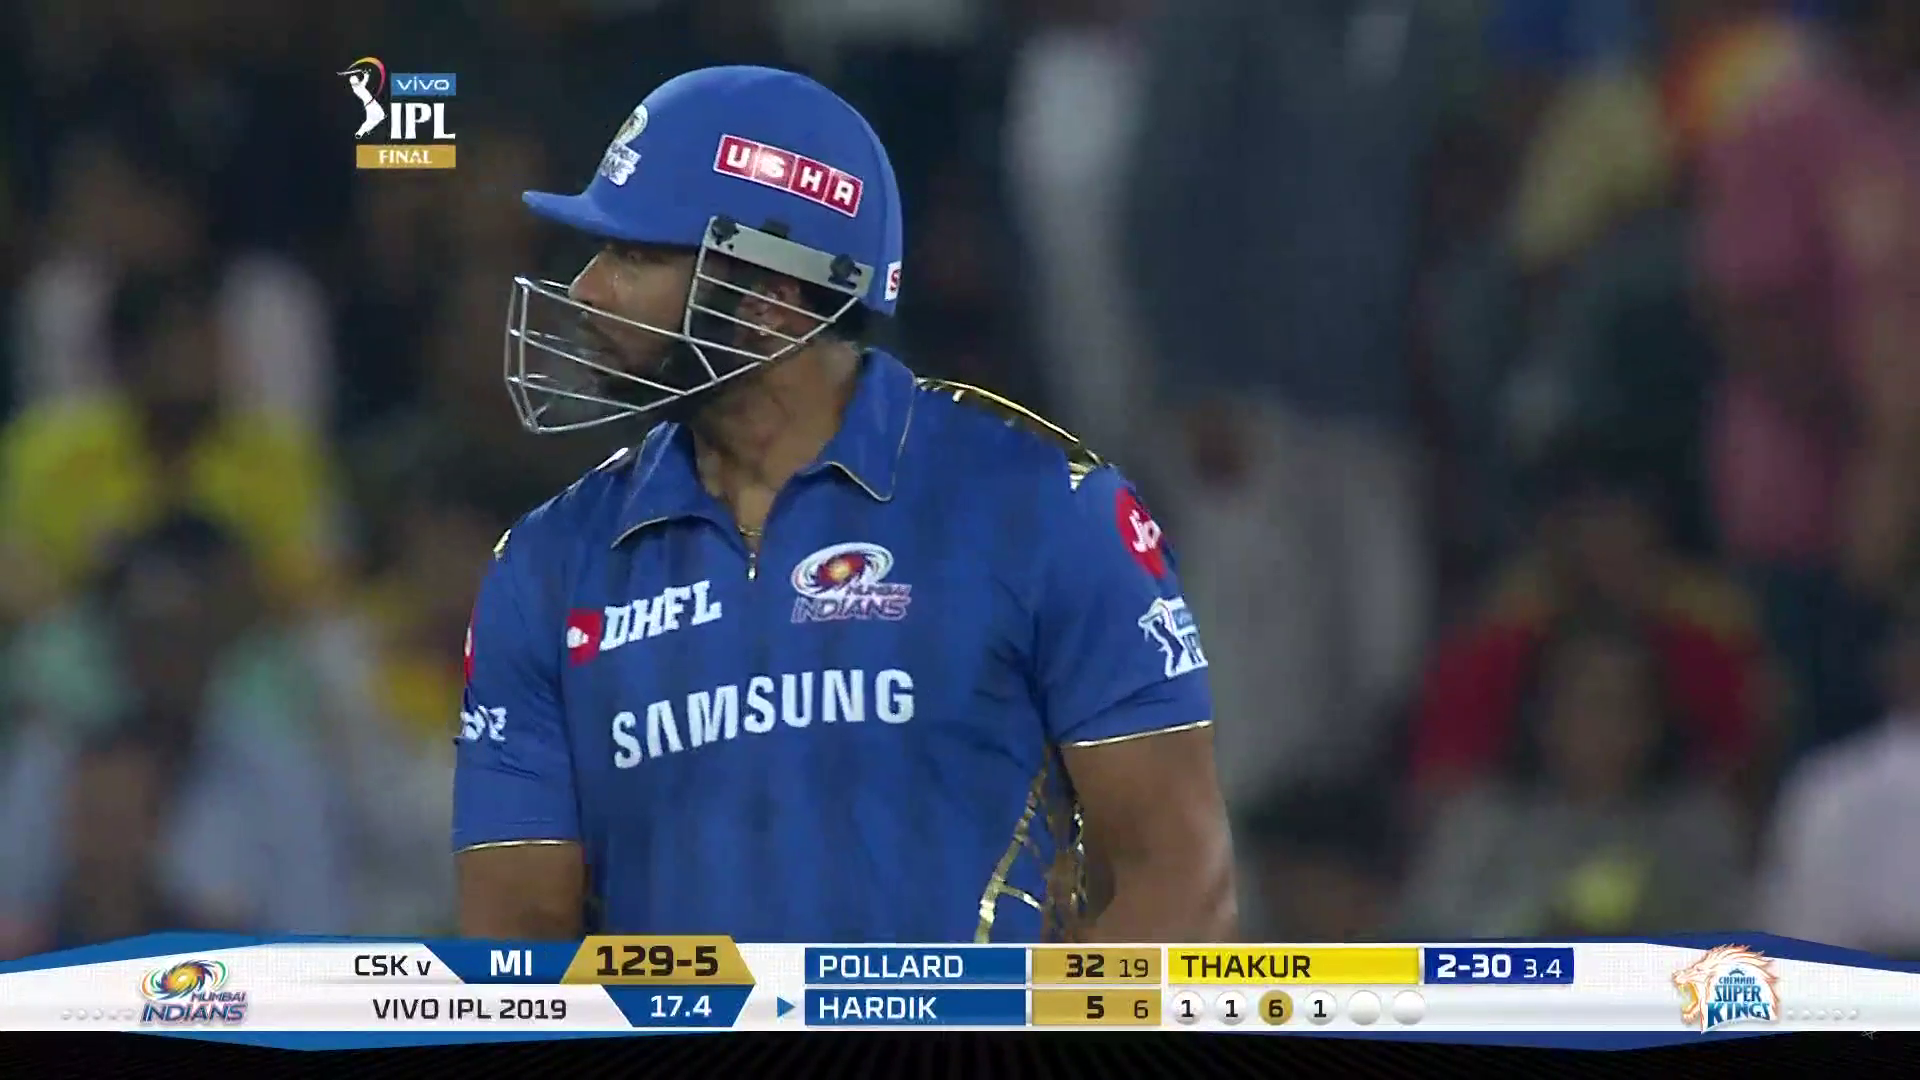

In [57]:
img = Image.open(path)
img 

In [58]:
logo_response = client.logo_detection(image=image, max_results =20)

In [59]:
for logo in logo_response.logo_annotations :
    print(logo.description)

Samsung Group
Indian Premier League
Chennai
uShip


In [60]:
img1 = ImageDraw.Draw(img) 
font = ImageFont.truetype("../../utils/fonts/arial.ttf", 30)

for logo in logo_response.logo_annotations:
    
    xmin = logo.bounding_poly.vertices[0].x
    ymin = logo.bounding_poly.vertices[0].y
    xmax = logo.bounding_poly.vertices[2].x
    ymax = logo.bounding_poly.vertices[2].y
    
    box = [(xmin, ymin), (xmax, ymax)]
    print(f"Logo :{logo.description} @ {box}")

    img1.rectangle(box, outline ="red", width=4)
    img1.text((xmin, ymin-25),logo.description, "green", font=font)


Logo :Samsung Group @ [(601, 660), (920, 774)]
Logo :Indian Premier League @ [(331, 49), (464, 177)]
Logo :Chennai @ [(1668, 941), (1796, 1035)]
Logo :uShip @ [(706, 129), (867, 219)]


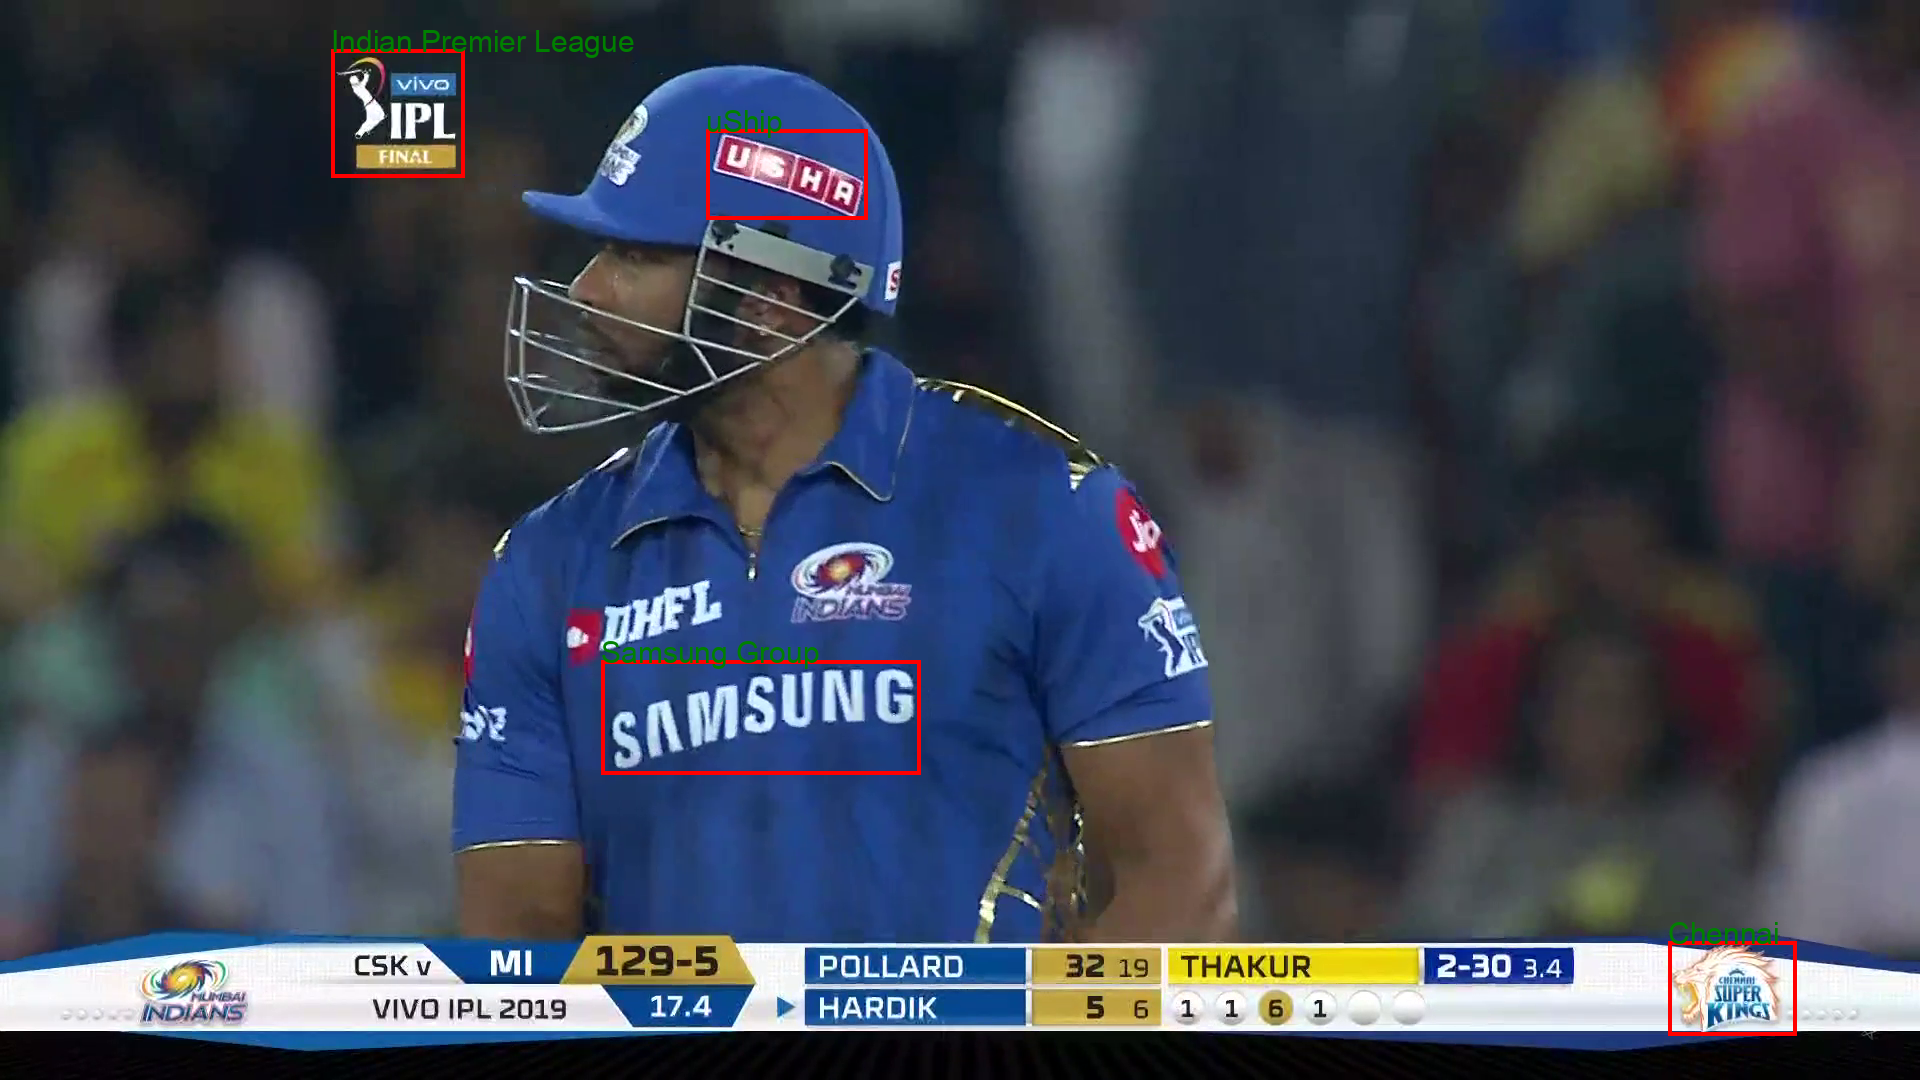

In [61]:
img

In [62]:
text_response = client.text_detection(image=image)

In [63]:
for text in text_response.text_annotations:
    print(text.description)

vivo
IPL
USHA
FINAL
NDIANS
* DHEL
SAMSUNG
CSK v
MI
129-5
POLLARD
32 19 THAKUR
2-30 3.4
CHEMHAI
SUPER
KINGS
HILIMBAI
INDIANS
VIVO IPL 2019
17.4
HARDIK
5 6
1 1 6

vivo
IPL
USHA
FINAL
NDIANS
*
DHEL
SAMSUNG
CSK
v
MI
129-5
POLLARD
32
19
THAKUR
2-30
3.4
CHEMHAI
SUPER
KINGS
HILIMBAI
INDIANS
VIVO
IPL
2019
17.4
HARDIK
5
6
1
1
6


In [64]:
img = Image.open(path)
img1 = ImageDraw.Draw(img) 
font = ImageFont.truetype("../../utils/fonts/arial.ttf", 30)

for text in text_response.text_annotations :
    if len(text.description) > 20:
        continue
    xmin = text.bounding_poly.vertices[0].x
    ymin = text.bounding_poly.vertices[0].y
    xmax = text.bounding_poly.vertices[2].x
    ymax = text.bounding_poly.vertices[2].y
    
    box = [(xmin, ymin), (xmax, ymax)]
    print(f"Logo :{text.description} @ {box}")

    img1.rectangle(box, outline ="green", width=4)
    img1.text((xmin, ymin-25),text.description, "red", font=font, stroke_width=1)


Logo :vivo @ [(397, 77), (448, 89)]
Logo :IPL @ [(356, 95), (454, 138)]
Logo :USHA @ [(724, 132), (853, 213)]
Logo :FINAL @ [(379, 150), (431, 163)]
Logo :NDIANS @ [(797, 589), (906, 611)]
Logo :* @ [(563, 630), (588, 643)]
Logo :DHEL @ [(589, 610), (723, 616)]
Logo :SAMSUNG @ [(606, 702), (915, 721)]
Logo :CSK @ [(355, 955), (407, 976)]
Logo :v @ [(417, 961), (430, 974)]
Logo :MI @ [(491, 951), (530, 974)]
Logo :129-5 @ [(598, 944), (716, 978)]
Logo :POLLARD @ [(820, 956), (961, 976)]
Logo :32 @ [(1066, 954), (1103, 976)]
Logo :19 @ [(1119, 959), (1147, 976)]
Logo :THAKUR @ [(1181, 955), (1309, 977)]
Logo :2-30 @ [(1439, 952), (1509, 978)]
Logo :3.4 @ [(1525, 958), (1560, 977)]
Logo :CHEMHAI @ [(1715, 976), (1757, 983)]
Logo :SUPER @ [(1706, 983), (1766, 1003)]
Logo :KINGS @ [(1713, 1001), (1771, 1022)]
Logo :HILIMBAI @ [(186, 990), (247, 1002)]
Logo :INDIANS @ [(140, 1001), (245, 1022)]
Logo :VIVO @ [(373, 997), (453, 1022)]
Logo :IPL @ [(456, 997), (492, 1022)]
Logo :2019 @ [(500, 9

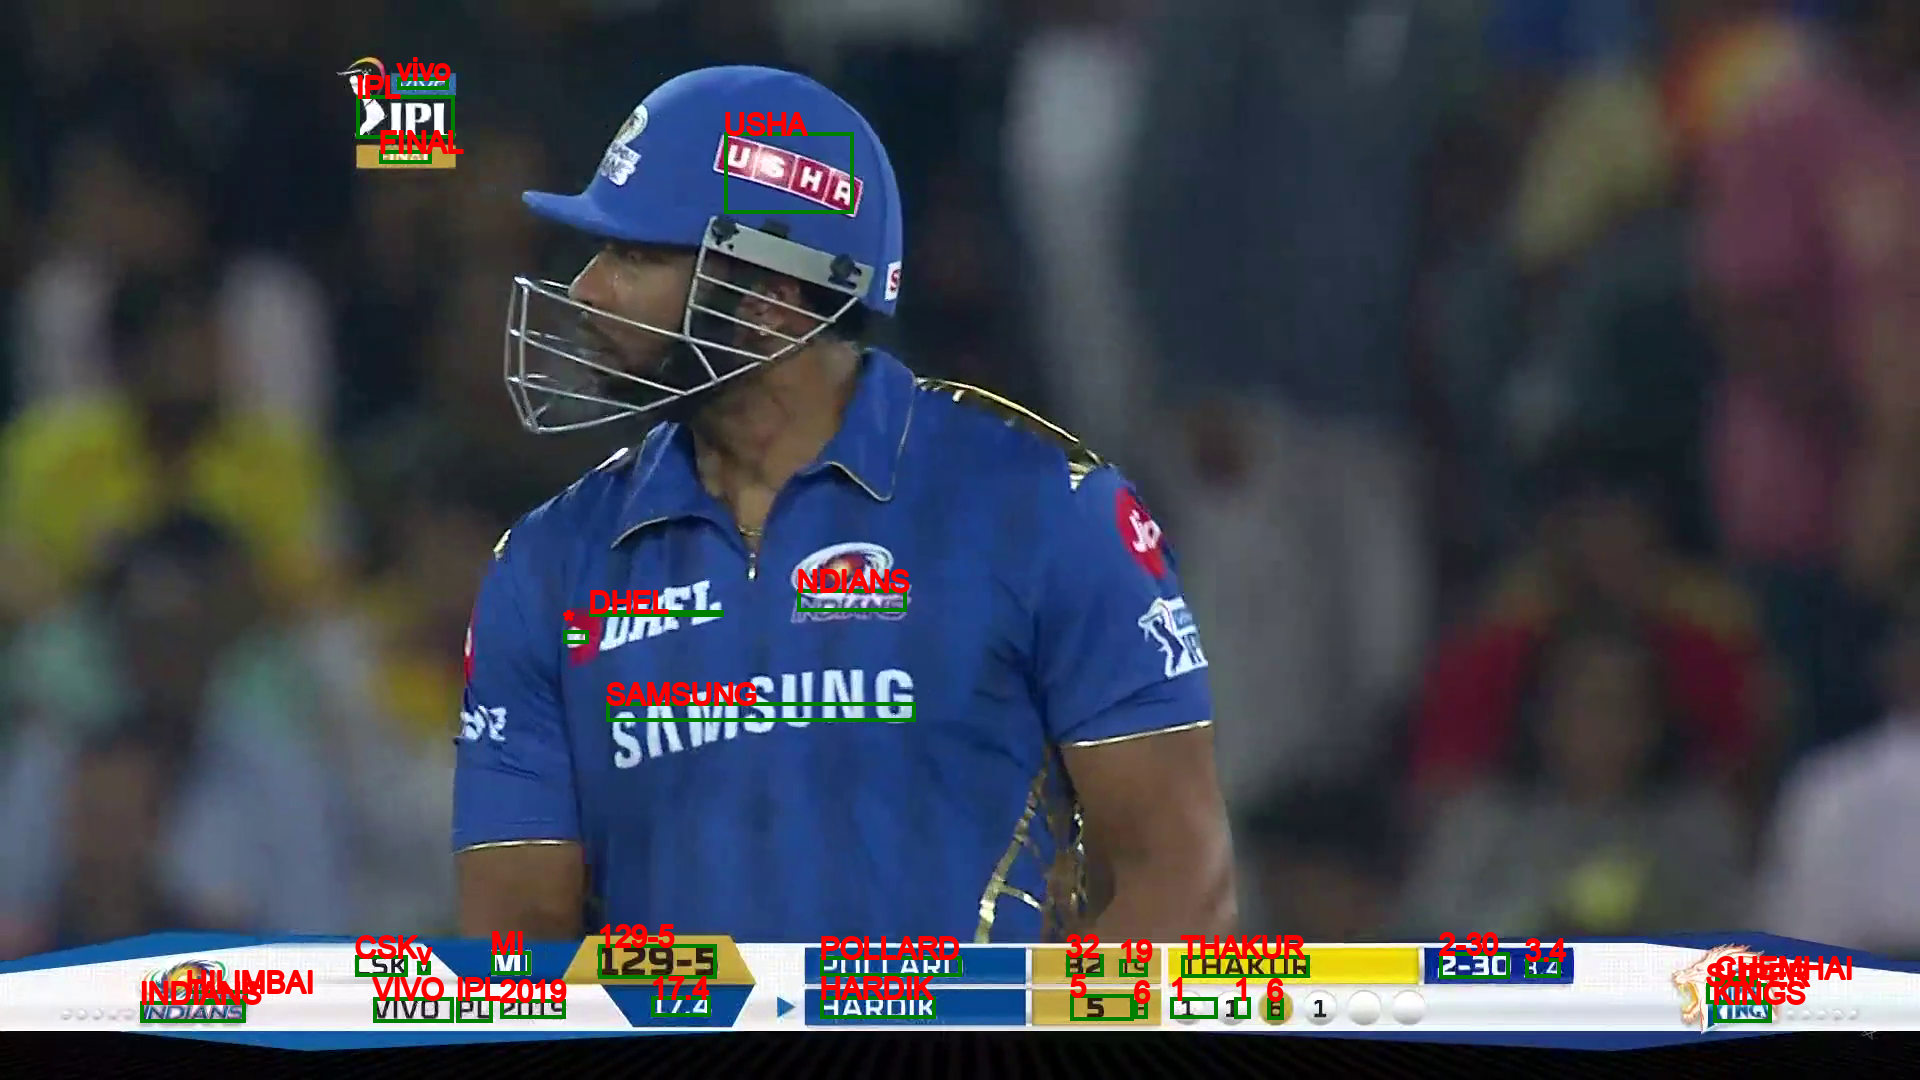

In [65]:
img

# Running in Batch

In [ ]:
import io
import os
import glob
from google.cloud import vision
from PIL import Image, ImageDraw, ImageFont
import json
import proto
from tqdm import tqdm

In [ ]:
frames_path = "../../data/frames/mi_csk/*.png"
images = glob.glob(frames_path)
sample_images = images[0:20]

In [ ]:
client = vision.ImageAnnotatorClient()

In [ ]:
def logo_extrator(img_path, output_save_path):
    
    image_name = os.path.basename(img_path)
    with io.open(img_path, 'rb') as image_file:
        content = image_file.read()
    
    image = vision.Image(content=content)
    logo_response = client.logo_detection(image=image, max_results =20)
    
    save_file_name = os.path.join(output_save_path, "logo_detection_" + image_name[:-4] + ".json")
    texts = proto.Message.to_dict(logo_response)
    with open(save_file_name, 'w') as fp:
        json.dump(texts, fp)

In [ ]:
def text_extrator(img_path, output_save_path):
    
    image_name = os.path.basename(img_path)
    with io.open(img_path, 'rb') as image_file:
        content = image_file.read()
    
    image = vision.Image(content=content)
    logo_response = client.text_detection(image=image, max_results =20)
    
    save_file_name = os.path.join(output_save_path, "text_detection_" + image_name[:-4] + ".json")
    texts = proto.Message.to_dict(logo_response)
    with open(save_file_name, 'w') as fp:
        json.dump(texts, fp)

In [ ]:
logo_detection_save_path = "/sports/model_results/logo_detection/"
text_detection_save_path = "/sports/model_results/text_detection/"

In [ ]:
for img in tqdm(images):
    logo_extrator(img, logo_detection_save_path)
    text_extrator(img, text_detection_save_path)

## Extract Info

In [12]:
import os
from tqdm import tqdm
import string
import glob
import json

In [ ]:
logo_sample = "/sports/model_results/logo_detection/logo_detection_mi_csv_frame000496.json"
text_sample = "/sports/model_results/text_detection/text_detection_mi_csv_frame000496.json"

In [ ]:
with open(logo_sample, 'r') as fp:
    logo_json = json.load(fp)
    
with open(text_sample, 'r') as fp:
    text_json = json.load(fp)

In [2]:
def extract_info(input_path):
    frame_text_dict = {}
    files = glob.glob(os.path.join(input_path + "*.json"))
    print(f"Found {len(files)} JSON files")
    for file in tqdm(files):          
        with open(file, 'r') as fp:
            text_json = json.load(fp)
        result = extract_image_text(text_json)
        frame_id = os.path.basename(file)
        frame_text_dict[frame_id] = result
    return frame_text_dict

In [3]:
def extract_image_text(gcp_ocr_json):
    line = ""
    for text in gcp_ocr_json["text_annotations"]:
        raw_string = text["description"] 
        clean_string = pre_process_string(raw_string)
        line = line + " " + clean_string
    return line

In [4]:
def pre_process_string(text):
    clean_text = text.lower()
    clean_text = clean_text.replace("\n", " ")
    clean_text = clean_text.translate(str.maketrans('', '', string.punctuation))
    return clean_text

In [13]:
ocr_data = "/sports/model_results/text_detection/"
info = extract_info(ocr_data)

Found 6638 JSON files


100%|██████████| 6638/6638 [00:10<00:00, 616.70it/s]


In [37]:
def check_presence(company_name, extracted_info):
    occurance = 0
    company_name = company_name.lower()
    for frame, text in extracted_info.items():
        if company_name in text:
            occurance = occurance + 1
    percentage = round((occurance*100)/len(extracted_info), 3)
    return percentage

In [38]:
check_presence("vivo", info)

82.163

In [39]:
check_presence("india cements", info)

1.989

In [40]:
check_presence("jio", info)

9.476

In [41]:
check_presence("paytm", info)

10.455

In [44]:
check_presence("dream11", info)

3.405

In [45]:
check_presence("ipl", info)

83.474

In [66]:
check_presence("samsung", info)

5.86

In [67]:
check_presence("dhfl", info)

8.316

In [69]:
check_presence("muthoot", info)

4.926

In [72]:
check_presence("ss", info)

9.295

In [74]:
check_presence("usha", info)

2.682